## Entregável 2

### Autor: Vítor Viana

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Descrição do dataset

<div style="text-align: justify"> O dataset contém informações relativas ao sexo, idade, altura e peso dos indivíduos entrevistados. Considerando a faixa etária especificada de 14 a 70 anos e os valores dos outros parâmetros é possível checar de antemão se há alguma feature com dados que precisam ser tratados. </div>

In [2]:
df = pd.read_csv("dataset2.csv")
df.head()

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890


In [3]:
df['sex'].unique()

array(['M', 'F', 'male', 'female'], dtype=object)

In [4]:
df['age'].describe()

count    10000.000000
mean        42.171700
std         16.425919
min         14.000000
25%         28.000000
50%         42.000000
75%         57.000000
max         70.000000
Name: age, dtype: float64

In [5]:
df['height'].describe()

count    10000.000000
mean         1.708993
std          0.099272
min          1.376462
25%          1.636008
50%          1.702588
75%          1.776343
max          2.054139
Name: height, dtype: float64

In [6]:
df['weight'].describe()

count    10000.000000
mean        88.910496
std         33.328269
min         17.970189
25%         69.394196
50%         83.518259
75%         99.050654
max        335.295817
Name: weight, dtype: float64

In [7]:
df.isnull().mean()

sex       0.0
age       0.0
height    0.0
weight    0.0
dtype: float64

<div style="text-align: justify"> Dessa análise inicial, percebe-se que em sexo foram registradas respostas para o sexo masculino como <i>'M'</i> e como <i>'male'</i> assim como para o sexo feminino tiveram os registros <i>'F'</i> e <i>'female'</i>. </div>

<div style="text-align: justify"> Pode-se ver também alguns valores suspeitos sobretudo em relação ao peso, mas é melhor analisar essa possível incongruência plotando gráficos para uma melhor visualização da distribuição dos valores. </div>

### 1. Esboço do gráfico

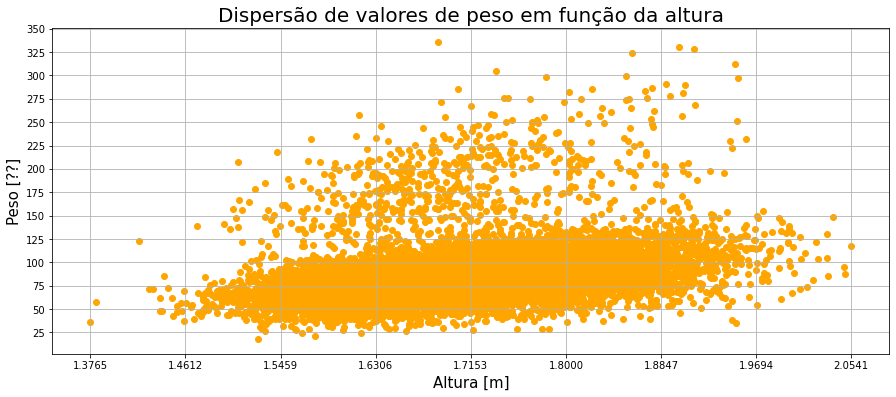

In [8]:
x = df['height']
y = df['weight']

xticks_array = []
n = 8
for i in range(n+1):
    xticks_array.append(df.iloc[:,2].min() + i*(df.iloc[:,2].max() - df.iloc[:,2].min())/n)

yticks_array = []
m = 14
for j in range(m):
    yticks_array.append((j+1)*25)

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="orange")
plt.title('Dispersão de valores de peso em função da altura', fontsize= 20) # Adiciona o título do gráfico
plt.xlabel('Altura [m]',fontsize = 15) # Adiciona o título do eixo x
plt.ylabel('Peso [??]', fontsize = 15) # Adiciona o título do eixo y
plt.xticks(xticks_array)
plt.yticks(yticks_array)
plt.grid()
plt.show()

<div style="text-align: justify"> Do gráfico esboçado é possível perceber que à medida que a altura aumenta, a tendência é que os valores de peso aumentem também, ou seja, há uma correlação positiva entre as features. Além disso, nota-se que a imensa maioria dos indivíduos enquadra-se na faixa de 1,55 a 1,88 metros de altura e entre 50 e 125 unidades de peso. Nesse caso, não se usou a unidade para o peso pelo fato de uma parcela significativa dos dados estar fora da concentração dos pontos (fato não usual), de modo que é preciso checar esses dados que estão destoando da distribuição esperada.  </div>

### 2. Inconsistência em features

<div style="text-align: justify"> Uma das inconsistências já foi previamente indentificada (coluna <i>'sex'</i>). A outra característica de alguma coluna do dataset afetada pela junção dos dois conjuntos de dados é a unidade do peso, que em algumas linhas está em <i>kg</i> enquanto que nas outras está em <i>pounds</i>. Como a inconsistência ocorreu devido à integração dos 2 conjuntos de dados distintos, basta tratar os dados de um dos conjuntos para uniformizar o dataset. Já considerando que o IMC é calculado em $ kg/m^2 $, optou-se por manter a unidade do peso em <i>kg</i>. Após dar o devido tratamento à essas features, plotou-se novamente o gráfico anterior para checar se os resultados foram coerentes. </div>

In [9]:
# localização das linhas do conjunto de dados que vai ser alterado
rows = []
for i in range(len(df)):
    if df['sex'].iloc[i] == 'male' or df['sex'].iloc[i] == 'female':
        rows.append(i)

# verificação
df.loc[rows, :]

,sex,age,height,weight
30,male,24,1.705208,182.135791
48,female,65,1.609532,145.446036
57,male,33,1.708634,126.539399
68,male,57,1.770826,121.244083
109,male,50,1.793294,239.725751
...,...,...,...,...
9957,female,63,1.674665,143.004450
9962,female,31,1.737863,144.781834
9984,female,45,1.632982,177.514903
9989,male,28,1.940960,195.461341


<div style="text-align: justify"> Com a descrição dos dados para as linhas correspondentes a esse segundo conjunto de dados é possível perceber que a distribuição dos valores de peso é bastante distinta do esperado considerando o dataset original, o que confirma o fato de a unidade utilizada ser diferente do outro conjunto de dados (que contém a maioria das entradas). </div>

In [10]:
df.loc[rows, :].describe()

,age,height,weight
count,659.000000,659.000000,659.000000
mean,42.694992,1.701653,180.936348
std,16.489367,0.096399,44.879280
min,14.000000,1.419564,61.106421
25%,29.000000,1.633500,148.137995
50%,42.000000,1.692808,176.457500
75%,57.000000,1.767464,208.595976
max,70.000000,1.960126,335.295817


In [11]:
# conversão dos valores de libras para quilogramas
new_column = []
for i in range(len(df)):
    if i in rows:
        weight = 0.453592 * df.iloc[i, 3]
    else:
        weight = df.iloc[i, 3]
    new_column.append(weight)
    
df['weight'] = new_column
df

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9995,M,68,1.999051,135.605141
9996,female,33,1.601821,64.397853
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


In [12]:
df['sex'].replace('male', 'M', inplace=True)
df['sex'].replace('female', 'F', inplace=True)
df

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9995,M,68,1.999051,135.605141
9996,F,33,1.601821,64.397853
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


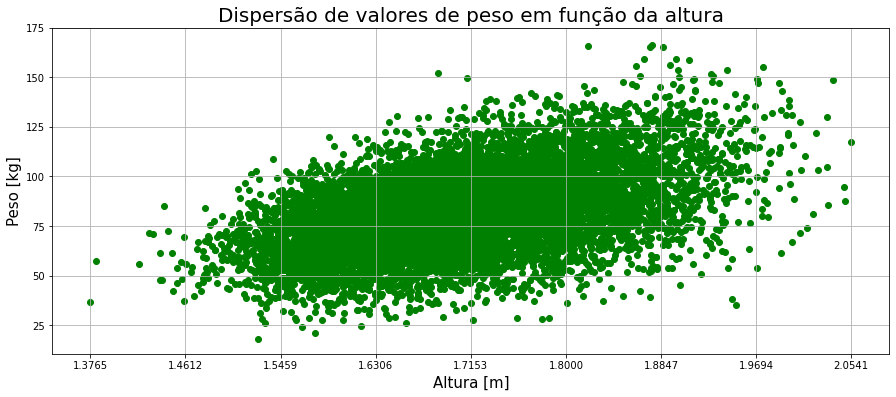

In [13]:
# plotando o gráfico novamente, agora com o dataset modificado
x = df['height']
y = df['weight']

xticks_array = []
n = 8
for i in range(n+1):
    xticks_array.append(df.iloc[:,2].min() + i*(df.iloc[:,2].max() - df.iloc[:,2].min())/n)

yticks_array = []
m = 7
for j in range(m):
    yticks_array.append((j+1)*25)

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="green")
plt.title('Dispersão de valores de peso em função da altura', fontsize= 20) # Adiciona o título do gráfico
plt.xlabel('Altura [m]',fontsize = 15) # Adiciona o título do eixo x
plt.ylabel('Peso [kg]', fontsize = 15) # Adiciona o título do eixo y
plt.xticks(xticks_array)
plt.yticks(yticks_array)
plt.grid()
plt.show()

<div style="text-align: justify"> Com esse novo gráfico observa-se a mesma correlação positiva mencionada e também a existência de <i>outliers</i>, que são os pontos que se distanciam bastante da grande concentração de pontos. Vale ressaltar que o comportamento observado no geral está dentro do esperado. </div>

### 3. Calculando valores de IMC

<div style="text-align: justify"> Para analisar o índice de massa corporal, foi criada uma nova coluna para o dataset obtida através das features <i>'height'</i> e <i>'weight'</i> por meio da relação: $ IMC = \frac{weight}{(height)^2} $ sendo as unidades no SI (<i>kg</i> para massa e <i>m</i> para altura). Assumindo que futuramente será checada a classificação do indivíduo em termos do IMC, utilizou-se a função <i>round()</i> para facilitar a comparação com a tabela de classes de IMC. </div>

In [14]:
df['IMC'] = round(df['weight']/((df['height']) ** 2), 1)
df

,sex,age,height,weight,IMC
0,M,62,1.874021,114.384199,32.6
1,F,44,1.672676,76.031332,27.2
2,F,49,1.587970,46.403086,18.4
3,F,25,1.653451,104.352744,38.2
4,M,65,1.744867,76.831890,25.2
...,...,...,...,...,...
9995,M,68,1.999051,135.605141,33.9
9996,F,33,1.601821,64.397853,25.1
9997,M,25,1.926656,131.105269,35.3
9998,F,32,1.844436,62.475271,18.4


### 4. Outliers uni e multivariados

<div style="text-align: justify"> Da descrição estatística da feature IMC, segue que os valores estão distribuídos entre 7.7 e 53.5, de modo que é possível que existam valores extremos que podem ser desconsiderados da análise. </div>

In [15]:
df['IMC'].describe()

count    10000.000000
mean        28.108270
std          5.996193
min          7.700000
25%         24.100000
50%         28.100000
75%         32.200000
max         53.500000
Name: IMC, dtype: float64

<div style="text-align: justify"> Os outliers univariados são aqueles que podem ser identificados diretamente da distribuição de cada feature, por exemplo através da obtenção de um boxplot que caracteriza essa distribuição. Em contrapartida, os outliers multivariados são valores extremos (que se distanciam da grande concentração de valores) quando consideradas mais variáveis. Simplificando, a diferença entre esses tipos de outliers consiste no número de dimensões levadas em conta. </div>

<div style="text-align: justify"> Dessa forma, no contexto do IMC, os outliers são do tipo multivariados, dado que analisar individualmente a distribuição da feature obtida pode não ser o ideal para identificar valores duvidosos, pois o IMC é uma função das features altura e peso. Nesse sentido, os outliers podem ser obtidos da análise do gráfico para a distribuição de peso em função da altura. </div>

<div style="text-align: justify"> O critério adotado para remover os outliers do dataset foi considerar uma regressão linear entre as features, dado o comportamento observado anteriormente, calculando em sequência a distância entre cada valor de peso e o valor esperado para a regressão. Assim, para valores de distância significativamente grandes (assumiu-se um erro de metade do valor esperado), os pontos foram considerados outliers e removidos do dataset. </div>

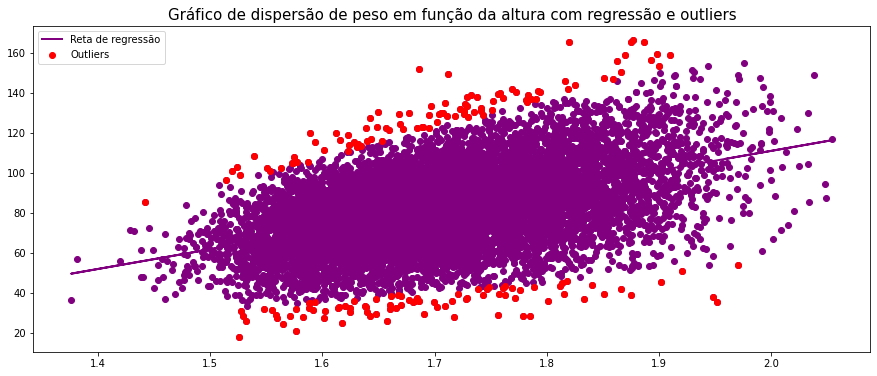

In [16]:
# gráfico que considera a distância vertical dos pontos para a reta de regressão
plt.figure(figsize=(15, 6))
x = df['height']
y = df['weight']
plt.scatter(x, y, color="purple")

coefficients = np.polyfit(df['height'], df['weight'], 1)
slope, intercept = coefficients

# adicionando a reta de regressão ao gráfico
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='purple', label='Reta de regressão', linewidth = 2)

# cálculo da distância vertical dos pontos e identificação dos outliers
values_pred = []
distances = []
rows = []
for i in range(len(df)):
    value = slope * df.iloc[i, 2] + intercept
    threshold = value/2
    dist = np.abs(df.iloc[i, 3] - value)
    values_pred.append(value)
    distances.append(dist)
    if dist > threshold:
        rows.append(i)

# destacando os outliers no gráfico
plt.scatter(df.iloc[rows, 2], df.iloc[rows, 3], color='red', label='Outliers')

plt.title('Gráfico de dispersão de peso em função da altura com regressão e outliers', fontsize = 15)
plt.legend()
plt.show()

In [17]:
df.drop(rows, axis = 0, inplace = True)
df

,sex,age,height,weight,IMC
0,M,62,1.874021,114.384199,32.6
1,F,44,1.672676,76.031332,27.2
2,F,49,1.587970,46.403086,18.4
3,F,25,1.653451,104.352744,38.2
4,M,65,1.744867,76.831890,25.2
...,...,...,...,...,...
9995,M,68,1.999051,135.605141,33.9
9996,F,33,1.601821,64.397853,25.1
9997,M,25,1.926656,131.105269,35.3
9998,F,32,1.844436,62.475271,18.4


In [18]:
df['IMC'].describe()

count    9816.000000
mean       28.083924
std         5.632906
min        14.000000
25%        24.100000
50%        28.100000
75%        32.100000
max        42.300000
Name: IMC, dtype: float64

<div style="text-align: justify"> Como é possível notar, os valores de IMC agora estão contidos na faixa entre 14 e 42.3, o que é mais pertinente do que a faixa obtida inicialmente considerando a tabela de classes de IMC. </div>

### 5. Classificação dos indivíduos quanto ao IMC

<div style="text-align: justify"> Considerando as classes de IMC, um valor de interesse para a saúde pública pode ser a razão de indivíduos classificados como não saudáveis em relação ao número total de entrevistados, considerando que a pessoa será saudável se o valor calculado estiver entre 18.5 e 24.9. Nesse sentido, considerando o dataset modificado, criando uma séries de dados atribuindo o valor 1 para os casos em que não é saudável e zero para os casos em que o indivíduo é saudável e, em seguida, calculando a média dessa série ($ \frac {não\;saudáveis}{total} $), obtém-se o percentual desejado. </div>

In [19]:
def identify_unhealthy(imc):
    if imc >= 18.5 and imc <= 24.9:
        return 0
    return 1

unhealthy_encoded = df['IMC'].apply(identify_unhealthy)
unhealthy_percentual = unhealthy_encoded.mean()
print('A porcentagem da população entrevistada fora da condição saudável é', round(100*unhealthy_percentual,2), '%.')

A porcentagem da população entrevistada fora da condição saudável é 75.01 %.


### 6. Relação entre features

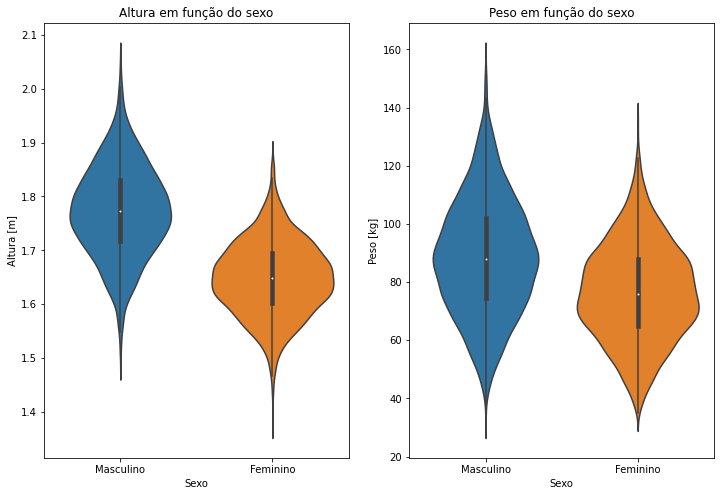

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

dicio = { 'sex': {'M': 'Masculino', 'F': 'Feminino'}}

# Violinplot 1
sns.violinplot(x='sex', y='height', data=df.replace(dicio), ax=axs[0]) # Realiza o violinplot
axs[0].set_title('Altura em função do sexo')
axs[0].set_xlabel('Sexo')
axs[0].set_ylabel('Altura [m]')

# Violinplot 2
sns.violinplot(x='sex', y='weight', data=df.replace(dicio), ax=axs[1]) # Realiza o violinplot
axs[1].set_title('Peso em função do sexo')
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Peso [kg]')

plt.show()

<div style="text-align: justify"> 
Da análise do violinplot da altura em função do sexo, segue que:
    
<ul>
<li>há uma maior concentração de registros em Turingópolis com altura entre 1.7 e 1.85 metros para o sexo masculino, enquanto que para o sexo feminino a concentração se dá entre 1.55 e 1.75;</li>
<li>a distribuição para o sexo masculino é mais simétrica, dado que apresenta pouca concentração em ambas as caudas e elas não destoam muito em tamanho, enquanto que na distribuição para o sexo feminino a cauda superior é mais curta do que a inferior (há valores extremos para baixo mais distantes da média do que para cima);</li>
<li>valores extremos de altura para o violinplot do sexo masculino são mais elevados do que para o sexo feminino</li>
</ul>
    
Por fim, considerando o violinplot para o peso:
<ul>
<li>há uma maior concentração de valores para o sexo feminino, enquanto que para o sexo masculino o intervalo de valores é maior;</li>
<li>a média de pesos para o sexo masculino é mais elevada do que para o sexo feminino;</li>
<li>valores extremos são mais distantes na distribuição para o sexo masculino</li>
</ul>
</div>